<a href="https://colab.research.google.com/github/ADv0rnik/Data-analysis-for-JER/blob/main/Pollution_dynamics03_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import pandas as pd
import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt
% matplotlib inline

In [81]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
import seaborn as sns

In [83]:
#connect the data to dataframe
path ='/content/drive/MyDrive/Colab Notebooks/Data for JER/activity2003_2020.csv'
df = pd.read_csv(path, parse_dates=['Date'])
df.head()

,Date,Conc
0,2003-01-01,22.0
1,2003-01-02,18.0
2,2003-01-03,22.0
3,2003-01-04,46.0
4,2003-01-05,23.0


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6487 entries, 0 to 6486
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    6487 non-null   datetime64[ns]
 1   Conc    6404 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 101.5 KB


In [85]:
df['Week'] = df.Date.dt.isocalendar().week
df['Month'] = df.Date.dt.month
df['Year'] = df.Date.dt.year
df

,Date,Conc,Week,Month,Year
0,2003-01-01,22.0,1,1,2003
1,2003-01-02,18.0,1,1,2003
2,2003-01-03,22.0,1,1,2003
3,2003-01-04,46.0,1,1,2003
4,2003-01-05,23.0,1,1,2003
...,...,...,...,...,...
6482,2020-12-27,12.0,52,12,2020
6483,2020-12-28,17.0,53,12,2020
6484,2020-12-29,10.0,53,12,2020
6485,2020-12-30,13.0,53,12,2020


In [86]:
#Adding dictionary for manipulating with month numbers
m_dict = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

In [87]:
df1 = df.resample('M', on = 'Date').mean()
df1.dropna(inplace = True)
df1.reset_index('Date', inplace=True)
df1['Month'] = df1.Date.dt.month
df1['Mon'] = df1['Month'].replace(m_dict)
df1['Week'] = df1.Date.dt.isocalendar().week
df1['Year'] = df1.Date.dt.year
df1['season'] = np.where(df1.Mon.isin(['Apr','May','Jun','Jul','Aug','Sep']), 'sum', 'win')
df1

,Date,Conc,Week,Month,Year,Mon,season
0,2003-01-31,19.200000,5,1,2003,Jan,win
1,2003-02-28,12.592593,9,2,2003,Feb,win
2,2003-03-31,17.333333,14,3,2003,Mar,win
3,2003-04-30,15.071429,18,4,2003,Apr,sum
4,2003-05-31,18.275862,22,5,2003,May,sum
...,...,...,...,...,...,...,...
208,2020-08-31,16.967742,36,8,2020,Aug,sum
209,2020-09-30,19.200000,40,9,2020,Sep,sum
210,2020-10-31,21.612903,44,10,2020,Oct,win
211,2020-11-30,22.000000,49,11,2020,Nov,win


In [88]:
df1.drop('Month', axis=1, inplace=True)
df1

,Date,Conc,Week,Year,Mon,season
0,2003-01-31,19.200000,5,2003,Jan,win
1,2003-02-28,12.592593,9,2003,Feb,win
2,2003-03-31,17.333333,14,2003,Mar,win
3,2003-04-30,15.071429,18,2003,Apr,sum
4,2003-05-31,18.275862,22,2003,May,sum
...,...,...,...,...,...,...
208,2020-08-31,16.967742,36,2020,Aug,sum
209,2020-09-30,19.200000,40,2020,Sep,sum
210,2020-10-31,21.612903,44,2020,Oct,win
211,2020-11-30,22.000000,49,2020,Nov,win


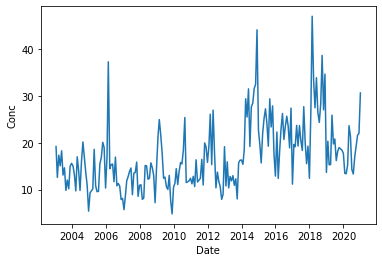

In [89]:
sns.lineplot(data = df1, x = 'Date', y = 'Conc')

In [90]:
df2 = df[df['Conc'] > 47]
df2.dropna(inplace = True)
df2['Mon'] = df2['Month'].replace(m_dict)
df2['season'] = np.where(df2.Mon.isin(['Apr','May','Jun','Jul','Aug','Sep']), 'sum', 'win')
df2.drop('Month',1, inplace=True)
df_sum = df2[df2['season'] == 'sum']
df_sum.head(50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

,Date,Conc,Week,Year,Mon,season
604,2004-08-27,62.0,35,2004,Aug,sum
1163,2006-05-06,48.0,18,2006,May,sum
2715,2010-08-05,49.0,31,2010,Aug,sum
2716,2010-08-06,55.0,31,2010,Aug,sum
2727,2010-08-17,60.0,33,2010,Aug,sum
3312,2012-04-23,50.0,17,2012,Apr,sum
3316,2012-04-27,52.0,17,2012,Apr,sum
4031,2014-04-12,55.0,15,2014,Apr,sum
4041,2014-04-22,52.0,17,2014,Apr,sum
4049,2014-04-30,56.0,18,2014,Apr,sum


In [91]:
df_sum.index[30]

4457

In [92]:
df_win = df2[df2['season'] == 'win']
df_win

,Date,Conc,Week,Year,Mon,season
7,2003-01-08,63.0,2,2003,Jan,win
72,2003-03-14,55.0,11,2003,Mar,win
389,2004-01-25,73.0,4,2004,Jan,win
948,2005-10-03,71.0,40,2005,Oct,win
981,2005-11-05,65.0,44,2005,Nov,win
...,...,...,...,...,...,...
6460,2020-12-05,69.0,49,2020,Dec,win
6465,2020-12-10,62.0,50,2020,Dec,win
6467,2020-12-12,51.0,50,2020,Dec,win
6468,2020-12-13,56.0,50,2020,Dec,win


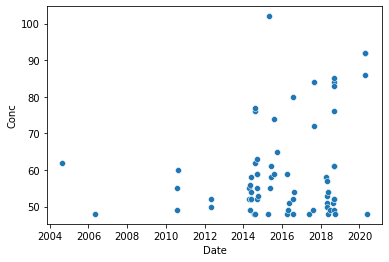

In [93]:
sns.scatterplot(x='Date', y = 'Conc', data=df_sum)

In [94]:
df2.tail(50)

,Date,Conc,Week,Year,Mon,season
5497,2018-04-17,58.0,16,2018,Apr,sum
5511,2018-05-01,53.0,18,2018,May,sum
5512,2018-05-02,51.0,18,2018,May,sum
5514,2018-05-04,57.0,18,2018,May,sum
5515,2018-05-05,50.0,18,2018,May,sum
5521,2018-05-11,54.0,19,2018,May,sum
5524,2018-05-14,48.0,20,2018,May,sum
5568,2018-06-27,49.0,26,2018,Jun,sum
5630,2018-08-28,51.0,35,2018,Aug,sum
5634,2018-09-01,61.0,35,2018,Sep,sum


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(2015-06-12 00:00:00, 64.0, '2015-06-12\n Fire in CEZ, \n 10 116 ha')

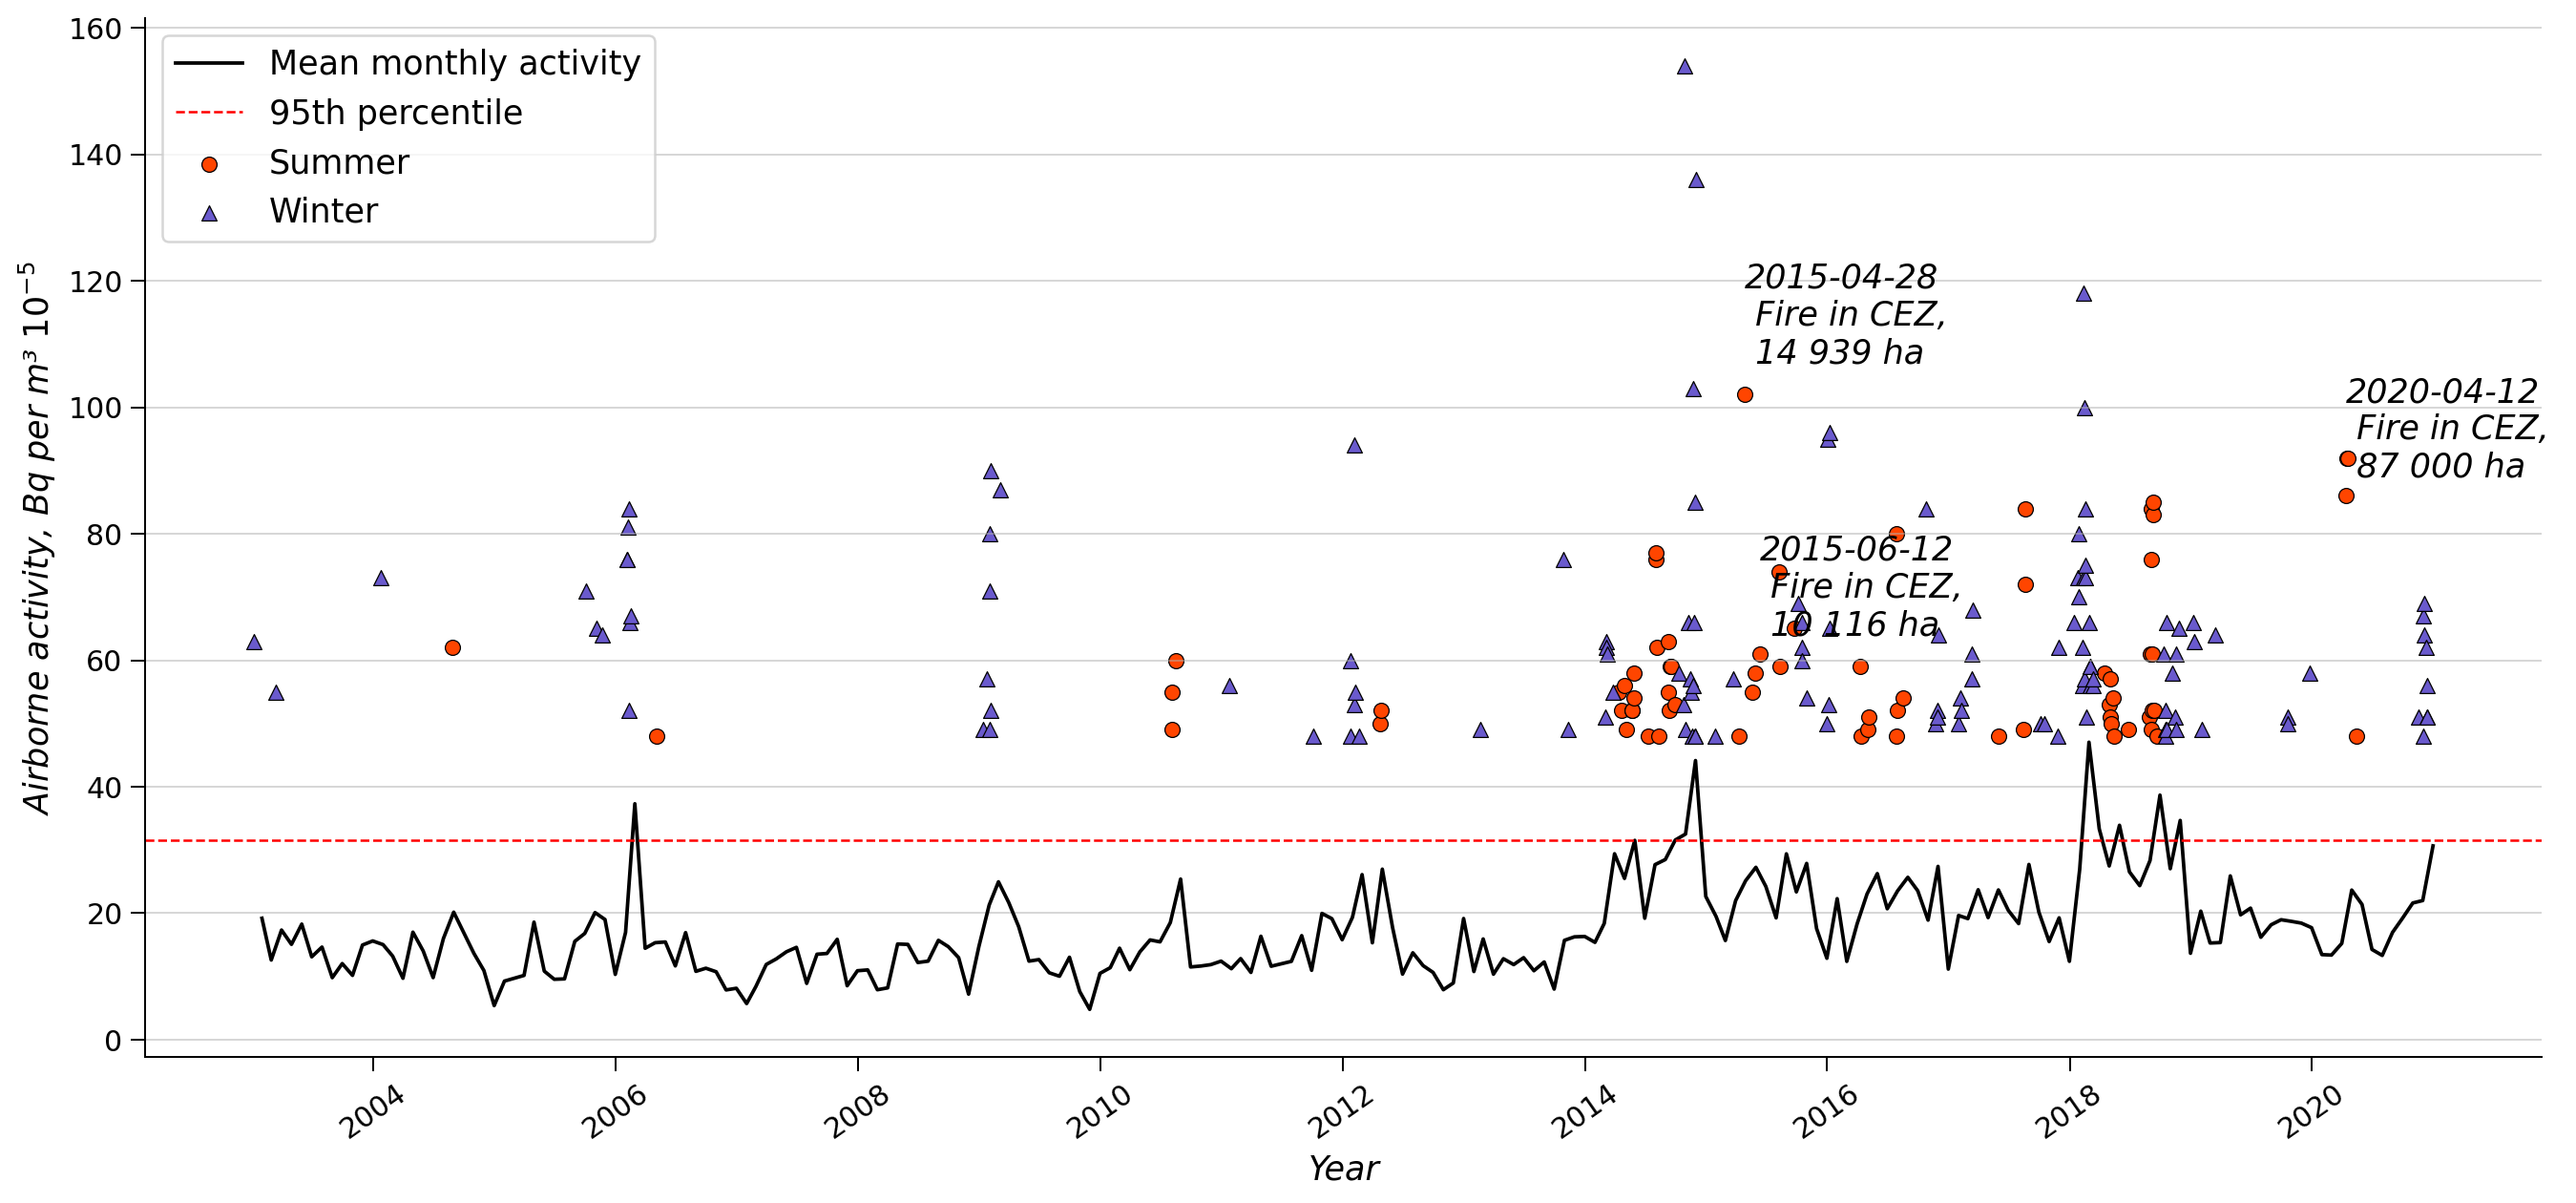

In [95]:
x = 'Date'
y = 'Conc'
s = chr(0x00b3)
s1 = ' $10^{-5}$'
cmap = 'seismic'
fig, ax = plt.subplots(figsize = (18,8), dpi = 180)
sns.lineplot(x, y, data= df1, color = 'black').axhline(31.6, linewidth = 1,
                                                       color = 'r',
                                                       linestyle = '--' )
sns.scatterplot(x, y, data=df_sum,
                s = 40,
                marker = 'o',
                fc = 'orangered',
                ec = 'black' )
sns.scatterplot(x, y, data=df_win,
                s = 40,
                marker = '^',
                fc = 'slateblue',
                ec = 'black' )
sns.despine(ax=ax, top=True, right=True)
ax.tick_params(axis = 'x', 
                direction='out',
                labelsize = 12,
                length = 6,
                rotation = 35)
ax.tick_params(axis = 'y', 
                direction='out',
                labelsize = 12,
                length = 6)
ax.set_ylabel('Airborne activity, Bq per m'+s + s1,
               fontsize = 14,
               fontstyle='oblique',
               fontweight = 'medium')
ax.set_xlabel('Year',
               fontsize = 14,
               fontstyle='oblique',
               fontweight = 'medium')
ax.legend(labels=["Mean monthly activity","95th percentile", "Summer", "Winter"], fontsize = 14, loc = 2)
ax.grid(axis='y', alpha = 0.5)
date = df_sum.Date[df_sum.index[27]].strftime('%Y-%m-%d')
date1 = df_sum.Date[df_sum.index[65]].strftime('%Y-%m-%d')
date2 = df_sum.Date[df_sum.index[30]].strftime('%Y-%m-%d')
plt.text(df_sum.Date[df_sum.index[27]], df_sum.Conc[df_sum.index[27]]+5,
         str(date) +'\n Fire in CEZ, \n 14 939 ha',
         fontdict=dict(color='black', size=14, style = 'oblique' ))
plt.text(df_sum.Date[df_sum.index[65]], df_sum.Conc[df_sum.index[65]]+3,
         str(date1) +'\n Fire in CEZ, \n 87 000 ha',
         fontdict=dict(color='black', size=14, style = 'oblique'))
plt.text(df_sum.Date[df_sum.index[30]], df_sum.Conc[df_sum.index[30]]+3,
         str(date2) +'\n Fire in CEZ, \n 10 116 ha',
         fontdict=dict(color='black', size=14, style = 'oblique'))
#plt.savefig('/content/drive/MyDrive/Colab Notebooks/Data for JER/fig6.png', dpi=180) 

In [96]:
df_sum.index[67]

6228

In [97]:
df_sum[df_sum['Year'] == 2015]

,Date,Conc,Week,Year,Mon,season
4393,2015-04-09,48.0,15,2015,Apr,sum
4412,2015-04-28,102.0,18,2015,Apr,sum
4433,2015-05-19,55.0,21,2015,May,sum
4443,2015-05-29,58.0,22,2015,May,sum
4457,2015-06-12,61.0,24,2015,Jun,sum
4514,2015-08-08,74.0,32,2015,Aug,sum
4517,2015-08-11,59.0,33,2015,Aug,sum
4562,2015-09-25,65.0,39,2015,Sep,sum


# **Mazyr data**

In [98]:
path1 = '/content/drive/MyDrive/Colab Notebooks/Data for JER/Airborne activity_Mazyr_2007_2018.csv'
df_moz = pd.read_csv(path1, parse_dates=['Date'])
df_moz.dropna(inplace = True)
df_moz.head(50)

,Date,Conc
0,2007-01-01,9.0
1,2007-01-02,5.0
2,2007-01-03,10.0
3,2007-01-04,10.0
4,2007-01-05,15.0
5,2007-01-06,5.0
6,2007-01-07,4.0
7,2007-01-08,6.0
8,2007-01-09,11.0
9,2007-01-10,6.0


In [99]:
df_moz['Week'] = df_moz.Date.dt.isocalendar().week
df_moz['Month'] = df_moz.Date.dt.month
df_moz['Year'] = df_moz.Date.dt.year
df_moz

,Date,Conc,Week,Month,Year
0,2007-01-01,9.0,1,1,2007
1,2007-01-02,5.0,1,1,2007
2,2007-01-03,10.0,1,1,2007
3,2007-01-04,10.0,1,1,2007
4,2007-01-05,15.0,1,1,2007
...,...,...,...,...,...
4104,2018-12-27,16.0,52,12,2018
4105,2018-12-28,11.0,52,12,2018
4106,2018-12-29,6.0,52,12,2018
4107,2018-12-30,24.0,52,12,2018


In [100]:
df_moz1 = df_moz.resample('M', on = 'Date').mean()
df_moz1.dropna(inplace = True)
df_moz1.reset_index('Date', inplace=True)
df_moz1['Month'] = df_moz1.Date.dt.month
df_moz1['Mon'] = df_moz1['Month'].replace(m_dict)
df_moz1['Week'] = df_moz1.Date.dt.isocalendar().week
df_moz1['Year'] = df_moz1.Date.dt.year
df_moz1['season'] = np.where(df_moz1.Mon.isin(['Apr','May','Jun','Jul','Aug','Sep']), 'sum', 'win')
df_moz1.drop('Month', axis=1, inplace=True)
df_moz1

,Date,Conc,Week,Year,Mon,season
0,2007-01-31,8.483871,5,2007,Jan,win
1,2007-02-28,14.111111,9,2007,Feb,win
2,2007-03-31,17.344828,13,2007,Mar,win
3,2007-04-30,16.366667,18,2007,Apr,sum
4,2007-05-31,20.709677,22,2007,May,sum
...,...,...,...,...,...,...
130,2018-08-31,14.129032,35,2018,Aug,sum
131,2018-09-30,19.966667,39,2018,Sep,sum
132,2018-10-31,25.483871,44,2018,Oct,win
133,2018-11-30,24.500000,48,2018,Nov,win


In [101]:
df_moz2 = df_moz[df_moz['Conc'] > 47]
df_moz2.dropna(inplace = True)
df_moz2['Mon'] = df_moz2['Month'].replace(m_dict)
df_moz2['season'] = np.where(df_moz2.Mon.isin(['Apr','May','Jun','Jul','Aug','Sep']), 'sum', 'win')
df_moz2.drop('Month',1, inplace=True)
df_moz_sum = df_moz2[df_moz2['season'] == 'sum']
df_moz_sum.head(50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

,Date,Conc,Week,Year,Mon,season
110,2007-04-21,51.0,16,2007,Apr,sum
140,2007-05-21,50.0,21,2007,May,sum
225,2007-08-14,53.0,33,2007,Aug,sum
260,2007-09-18,68.0,38,2007,Sep,sum
463,2008-04-08,48.0,15,2008,Apr,sum
614,2008-09-06,55.0,36,2008,Sep,sum
830,2009-04-10,56.0,15,2009,Apr,sum
838,2009-04-18,55.0,16,2009,Apr,sum
983,2009-09-10,64.0,37,2009,Sep,sum
1188,2010-04-03,67.0,13,2010,Apr,sum


In [102]:
df_moz_win =df_moz2[df_moz2['season'] == 'win']
df_moz_win

,Date,Conc,Week,Year,Mon,season
78,2007-03-20,63.0,12,2007,Mar,win
81,2007-03-23,60.0,12,2007,Mar,win
276,2007-10-04,69.0,40,2007,Oct,win
277,2007-10-05,53.0,40,2007,Oct,win
283,2007-10-11,58.0,41,2007,Oct,win
...,...,...,...,...,...,...
4034,2018-10-18,69.0,42,2018,Oct,win
4046,2018-10-30,91.0,44,2018,Oct,win
4064,2018-11-17,53.0,46,2018,Nov,win
4065,2018-11-18,78.0,46,2018,Nov,win


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


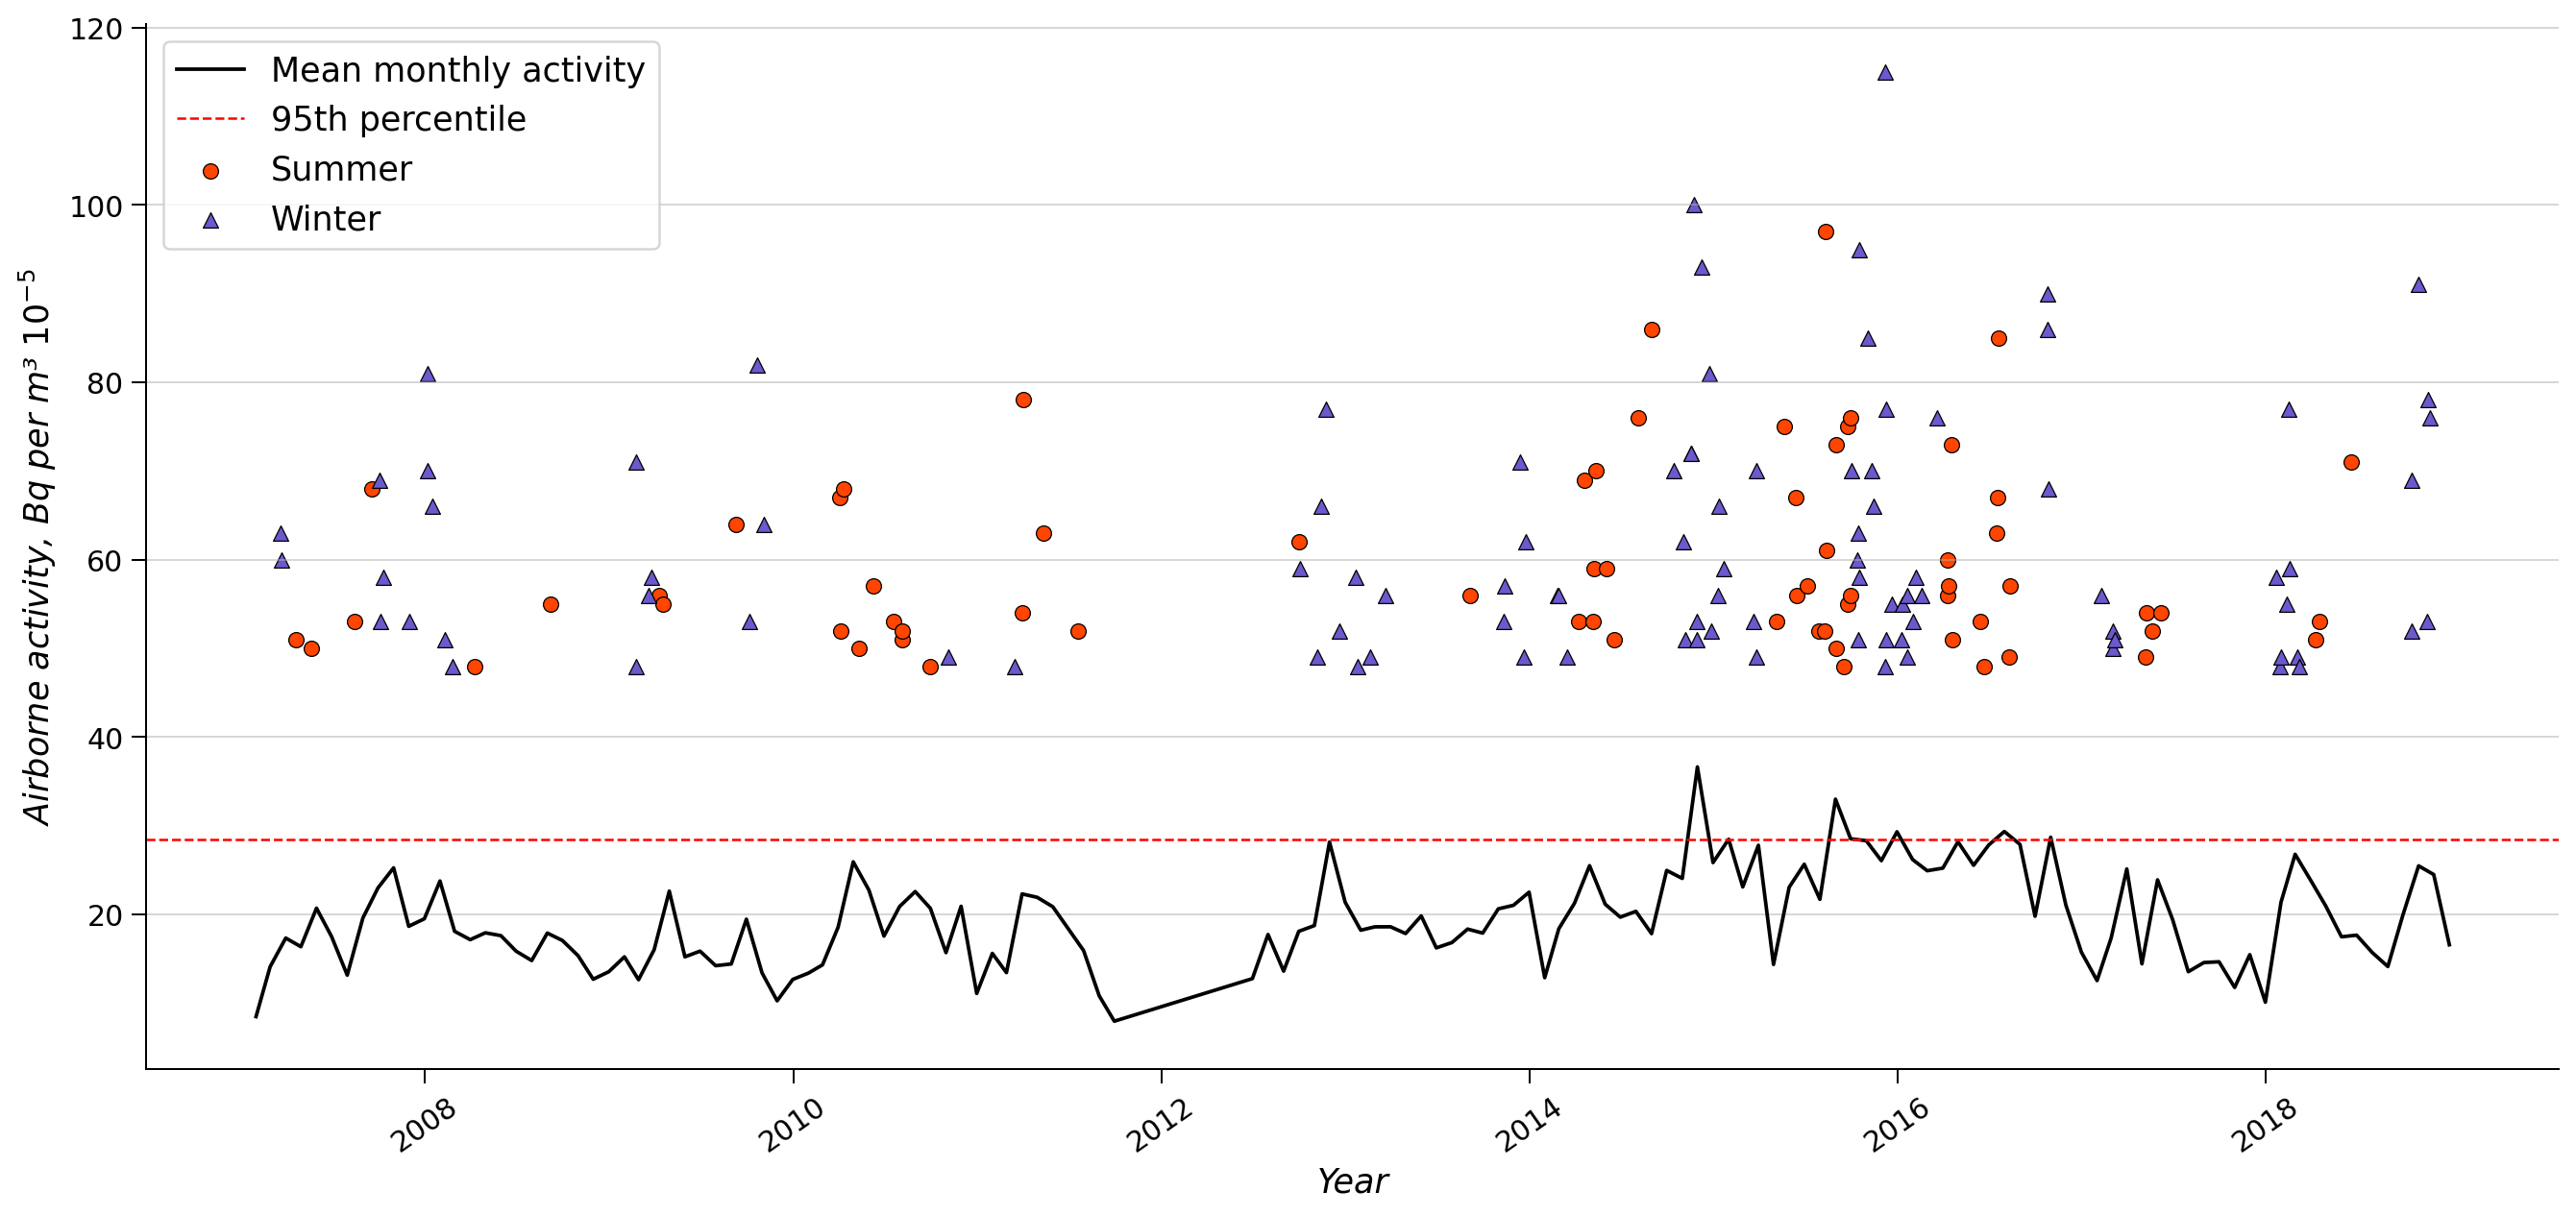

In [103]:
x1 = 'Date'
y1 = 'Conc'
s = chr(0x00b3)
s1 = ' $10^{-5}$'
cmap = 'seismic'
fig, ax = plt.subplots(figsize = (18,8), dpi = 180)
sns.lineplot(x1, y1, data= df_moz1, color = 'black').axhline(28.5, linewidth = 1,
                                                       color = 'r',
                                                       linestyle = '--' )
sns.scatterplot(x1, y1, data=df_moz_sum,
                s = 40,
                marker = 'o',
                fc = 'orangered',
                ec = 'black' )
sns.scatterplot(x1, y1, data=df_moz_win,
                s = 40,
                marker = '^',
                fc = 'slateblue',
                ec = 'black' )
sns.despine(ax=ax, top=True, right=True)
ax.tick_params(axis = 'x', 
                direction='out',
                labelsize = 12,
                length = 6,
                rotation = 35)
ax.tick_params(axis = 'y', 
                direction='out',
                labelsize = 12,
                length = 6)
ax.set_ylabel('Airborne activity, Bq per m'+s + s1,
               fontsize = 14,
               fontstyle='oblique',
               fontweight = 'medium')
ax.set_xlabel('Year',
               fontsize = 14,
               fontstyle='oblique',
               fontweight = 'medium')
ax.legend(labels=["Mean monthly activity","95th percentile", "Summer", "Winter"], fontsize = 14, loc = 2)
ax.grid(axis='y', alpha = 0.5)
#plt.savefig('/content/drive/MyDrive/Colab Notebooks/Data for JER/fig6.png', dpi=180) 